___
# Ciência dos Dados - PROJETO 2

___
## Jhonata Ferreira

## Matheus Augusto 

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\jhona\Downloads\Ciencia dos Dados DP\Projeto 2


In [4]:
dados = pd.read_excel('spamhamV2.xlsx',sep=',')
dados.head()

,Email,Class
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
treinamento=dados.sample(frac=0.75)
treinamento.reset_index(drop = True, inplace = True)
teste=dados.drop(treinamento.index)
teste.reset_index(drop = True, inplace = True)

In [6]:
treinamento.head()

,Email,Class
0,"Good morning, my Love ... I go to sleep now an...",ham
1,Hanging out with my brother and his family,ham
2,Send to someone else :-),ham
3,HOT LIVE FANTASIES call now 08707509020 Just 2...,spam
4,Ok set let u noe e details later...,ham


In [7]:
teste.head()

,Email,Class
0,"swhrt how u dey,hope ur ok, tot about u 2day.l...",ham
1,"Ok da, i already planned. I wil pick you.",ham
2,Urgent! Please call 0906346330. Your ABTA comp...,spam
3,"Sorry, I'll call later in meeting",ham
4,I just really need shit before tomorrow and I ...,ham


In [8]:
Ham_t = treinamento.loc[treinamento.Class == 'ham']
Spam_t = treinamento.loc[treinamento.Class == 'spam']

In [9]:
def clean(lista):
    i=0
    while i < len (lista):
        lista[i]=lista[i].replace("_"," ")
        lista[i]=lista[i].replace("'"," ")
        lista[i]=lista[i].replace("?"," ")
        lista[i]=lista[i].replace("$"," ")
        lista[i]=lista[i].replace("*"," ")
        lista[i]=lista[i].replace("%"," ")
        lista[i]=lista[i].replace("-"," ")
        lista[i]=lista[i].replace("<"," ")
        lista[i]=lista[i].replace(">"," ")
        lista[i]=lista[i].replace("'"," ")
        lista[i]=lista[i].replace('"'," ")
        lista[i]=lista[i].replace("!"," ")
        lista[i]=lista[i].replace("."," ")
        lista[i]=lista[i].replace(","," ")
        lista[i]=lista[i].replace("|"," ")
        lista[i]=lista[i].replace(":"," ")
        lista[i]=lista[i].replace("&"," ")
        lista[i]=lista[i].replace("("," ")
        lista[i]=lista[i].replace(")"," ")
        lista[i]=lista[i].replace("+"," ")
        lista[i]=lista[i].replace("#"," ")
        lista[i]=lista[i].replace("^"," ")
        lista[i]=lista[i].replace("÷"," ")
        lista[i]=lista[i].replace("and"," ")
        lista[i]=lista[i].replace("is"," ")
        i+=1
    lista=list(filter(None, lista))

    return lista

In [10]:
#Criando listas com palavras
Ham_palavras = []
for email in Ham_t.Email:
    palavras = email.split()
    for palavra in palavras:
        Ham_palavras.append(palavra)
        
Spam_palavras = []
for email in Spam_t.Email:
    palavras = email.split()
    for palavra in palavras:
        Spam_palavras.append(palavra)

Treinamento_palavras_totais = []
for email in treinamento.Email:
    palavras = email.split()
    for palavra in palavras:
        Treinamento_palavras_totais.append(palavra)
Treinamento_palavras = np.unique(Treinamento_palavras_totais)

In [11]:
ham_clean=clean(Ham_palavras)
spam_clean=clean(Spam_palavras)
treinamento_clean=(Treinamento_palavras)


In [ ]:
Treinamento_palavras


## 3. Classificador Naive-Bayes

In [12]:
#P(SPAM)
Pspam = len(Spam_t)/len(treinamento)

#P(HAM)
Pham = 1 - Pspam

#P(word/SPAM)
def PwordSPAM(word):
    word_count = Spam_palavras.count(word)
    word_count = word_count + 1
    Pdivisor = len(Spam_palavras) + len(Treinamento_palavras)
    Pwspam = word_count/Pdivisor
    return Pwspam

#P(word/HAM)
def PwordHAM(word):
    word_count = Ham_palavras.count(word)
    word_count = word_count + 1
    Pdivisor = len(Ham_palavras) + len(Treinamento_palavras)
    Pwham = word_count/Pdivisor
    return Pwham

def Pword(word):
    word_count = Treinamento_palavras_totais.count(word)
    word_count = word_count + 1
    Pdivisor = len(Treinamento_palavras_totais) + len(Treinamento_palavras)
    Pw = word_count/Pdivisor
    return Pw

In [13]:
# Classificador

def Class_PSPAM(mensagem):
    P = 1
    for palavra in mensagem:
        P = P * PwordSPAM(palavra)
    return P

def Class_PHAM(mensagem):
    P = 1
    for palavra in mensagem:
        P = P * PwordHAM(palavra)
    return P

def Class_P(mensagem):
    P = 1
    for palavra in mensagem:
        P = P * Pword(palavra)
    return P

In [14]:
teste['Teste'] = 0

for index in range(0,len(teste)):
    mensagem = teste.Email[index]
    mensagem = clean(mensagem.split())
    if Class_PSPAM(mensagem)*Pspam < Class_PHAM(mensagem)*Pham:
        teste.Teste.loc[index] = 'ham'
        
    else:
        teste.Teste.loc[index] = 'spam'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
resultado = pd.crosstab(teste.Class, teste.Teste)
resultado

Teste,ham,spam
Class,,
ham,1196,15
spam,5,177


In [16]:
print(resultado)

Teste   ham  spam
Class            
ham    1196    15
spam      5   177


In [17]:
teste.head()

,Email,Class,Teste
0,"swhrt how u dey,hope ur ok, tot about u 2day.l...",ham,ham
1,"Ok da, i already planned. I wil pick you.",ham,ham
2,Urgent! Please call 0906346330. Your ABTA comp...,spam,spam
3,"Sorry, I'll call later in meeting",ham,ham
4,I just really need shit before tomorrow and I ...,ham,ham


___
## 4. Curva ROC

In [71]:
for index in range(0,len(teste)):
    
    mensagem = teste.Email[index]
    mensagem = clean(mensagem.split())
    mensagem = ' '.join(mensagem)
    teste.Email[index] = mensagem


In [ ]:
EspecC = []
Sens = []
PC = []

for pc in np.arange(0.1,1,0.01):


    for index in range(0,len(teste)):
        
        mensagem = teste.Email[index]
        mensagem = mensagem.split()
        aaa = Class_PSPAM(mensagem)
        aab = Class_PHAM(mensagem)
        if aaa*Pspam > pc*(aaa*Pspam+aab*Pham):
            teste.Teste.loc[index] = 'spam'
            
        else:
            teste.Teste.loc[index] = 'ham'
        
    resultado = pd.crosstab(teste.Class, teste.Teste)
    
    if resultado.shape[1] == 1:
        print('break')
        break

    sens = resultado.spam[1]/(resultado.spam[0] + resultado.spam[1])
    espec = resultado.ham[0]/(resultado.ham[0] + resultado.ham[1])
    
    EspecC.append(1 - espec)
    Sens.append(sens)
    PC.append(pc)

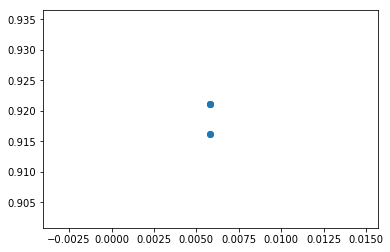

In [73]:
plt.scatter(EspecC,Sens)
plt.show()

In [56]:
PC

[0.29999999999999999,
 0.31,
 0.32000000000000001,
 0.33000000000000002,
 0.34000000000000002,
 0.35000000000000003,
 0.36000000000000004,
 0.37000000000000005,
 0.38000000000000006,
 0.39000000000000007,
 0.40000000000000008,
 0.41000000000000009,
 0.4200000000000001,
 0.4300000000000001,
 0.44000000000000011,
 0.45000000000000012,
 0.46000000000000013,
 0.47000000000000014,
 0.48000000000000015,
 0.49000000000000016,
 0.50000000000000022]

___
## 5. Qualidade do Classificador alterando a base de treinamento